In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve
from sklearn.pipeline import Pipeline

In [2]:
# Please do not delete this line
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [3]:
# import data
df = pd.read_csv('https://raw.githubusercontent.com/lilfakeS/MBAN6300Final/main/train.csv')

/var/folders/jh/lwh9h51151s6_693cw5_28cr0000gn/T/ipykernel_30640/3732626626.py:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('https://raw.githubusercontent.com/lilfakeS/MBAN6300Final/main/train.csv')


### Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [5]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [6]:
df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [7]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [8]:
# fill in numerical NA with mean value
df['Monthly_Inhand_Salary'] = df['Monthly_Inhand_Salary'].fillna(df['Monthly_Inhand_Salary'].mean())
df['Num_Credit_Inquiries'] = df['Num_Credit_Inquiries'].fillna(df['Num_Credit_Inquiries'].mean())


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [10]:
# check na value number
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [11]:
#detect strange value and convert str in to float
object_col = df.describe(include='O').columns

In [12]:
for col in object_col:
    print(f'Column Name：{col}')
    print("**" * 20)
    print(df[col].value_counts(dropna=False))
    print('END', "--" * 18, '\n')


Column Name：ID
****************************************
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
END ------------------------------------ 

Column Name：Customer_ID
****************************************
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name：Month
****************************************
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
END ------------------------------------ 

Column Name：Name
****************************************
Name
NaN               9985
Stevex      

In [13]:
# delete '_', ',' and space in data and replace strange value with na.
def text_cleaning(data):
    return str(data).strip('_ ,"') if isinstance(data, str) else data

In [14]:
df = df.applymap(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.170850,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,4194.170850,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,4194.170850,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,NaN,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [15]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries            0
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [16]:
df.select_dtypes('O').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       100000 non-null  object
 1   Customer_ID              100000 non-null  object
 2   Month                    100000 non-null  object
 3   Name                     90015 non-null   object
 4   Age                      100000 non-null  object
 5   SSN                      94428 non-null   object
 6   Occupation               92938 non-null   object
 7   Annual_Income            100000 non-null  object
 8   Num_of_Loan              100000 non-null  object
 9   Type_of_Loan             88592 non-null   object
 10  Num_of_Delayed_Payment   92998 non-null   object
 11  Changed_Credit_Limit     97909 non-null   object
 12  Credit_Mix               79805 non-null   object
 13  Outstanding_Debt         100000 non-null  object
 14  Credit_History_Age   

In [17]:
# transform object into float and integer.
df['Age']                     = df.Age.astype(int) 
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int) 
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

In [18]:
# convert Credit_History_Age into months as numerical 
def Month_Converter(x):
    return (int(x.split(' ')[0])*12 + int(x.split(' ')[3])) if pd.notnull(x) else x

In [19]:
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

In [20]:
df.groupby('Customer_ID')['Credit_History_Age'].apply(list)

Customer_ID
CUS_0x1000    [122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128...
CUS_0x1009    [365.0, 366.0, 367.0, nan, 369.0, 370.0, 371.0...
CUS_0x100b    [183.0, nan, 185.0, 186.0, 187.0, 188.0, 189.0...
CUS_0x1011    [183.0, 184.0, 185.0, 186.0, 187.0, 188.0, 189...
CUS_0x1013    [207.0, 208.0, 209.0, 210.0, nan, 212.0, 213.0...
                                    ...                        
CUS_0xff3     [201.0, 202.0, 203.0, 204.0, 205.0, 206.0, 207...
CUS_0xff4     [218.0, 219.0, 220.0, 221.0, 222.0, nan, 224.0...
CUS_0xff6     [292.0, 293.0, 294.0, 295.0, 296.0, 297.0, 298...
CUS_0xffc     [151.0, nan, 153.0, 154.0, 155.0, 156.0, 157.0...
CUS_0xffd     [218.0, 219.0, 220.0, 221.0, 222.0, 223.0, 224...
Name: Credit_History_Age, Length: 12500, dtype: object

In [21]:
#data cleaning for Type_of _Loan
def clean_loan_type(x):
    return x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x

df['Type_of_Loan'] = df['Type_of_Loan'].apply(clean_loan_type)

In [22]:
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                                              
CUS_0x1000   credit-builder loan,home equity loan                                                                                          8
CUS_0x1009   not specified,home equity loan,credit-builder loan,payday loan                                                                8
CUS_0x100b   NaN                                                                                                                           8
CUS_0x1011   student loan,credit-builder loan,debt consolidation loan                                                                      8
CUS_0x1013   student loan,debt consolidation loan,personal loan                                                                            8
                                                                                                                                          ..
CUS_0xff3    perso

### Data Visualization

<Axes: xlabel='Occupation'>

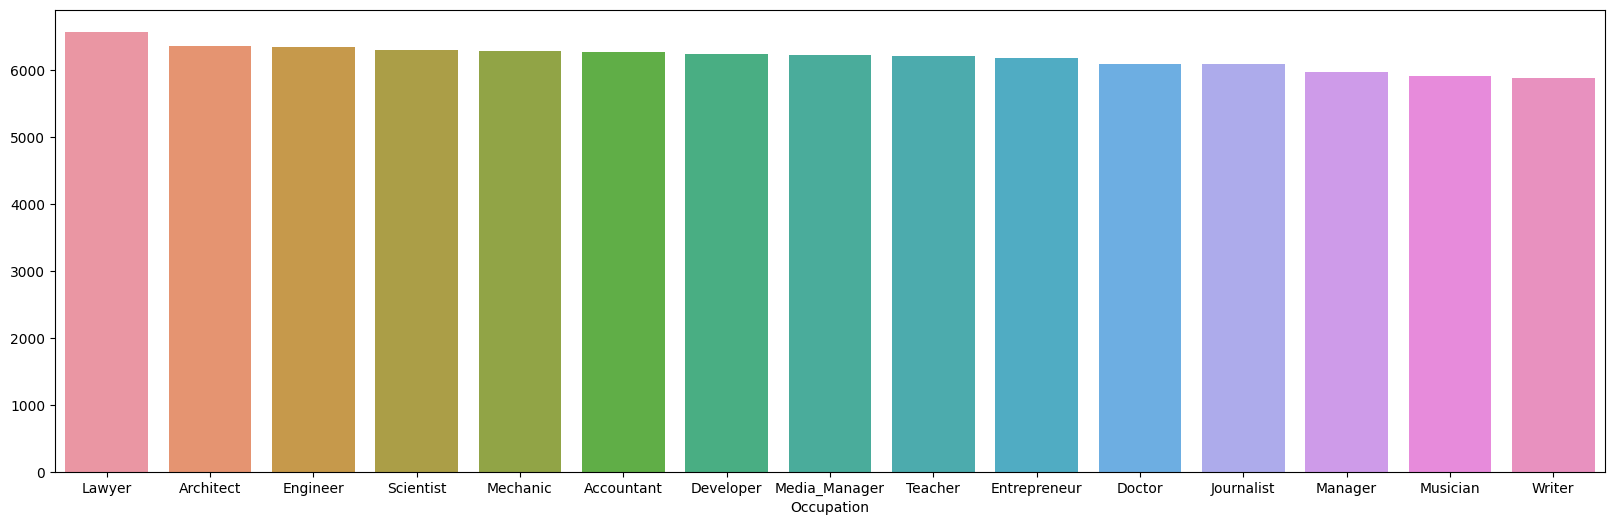

In [23]:
#distribution of Occupation
occupation_counts = df['Occupation'].value_counts()
plt.figure(figsize=(20,6))
sns.barplot(x=occupation_counts.index, y=occupation_counts.values)

<Axes: xlabel='Month'>

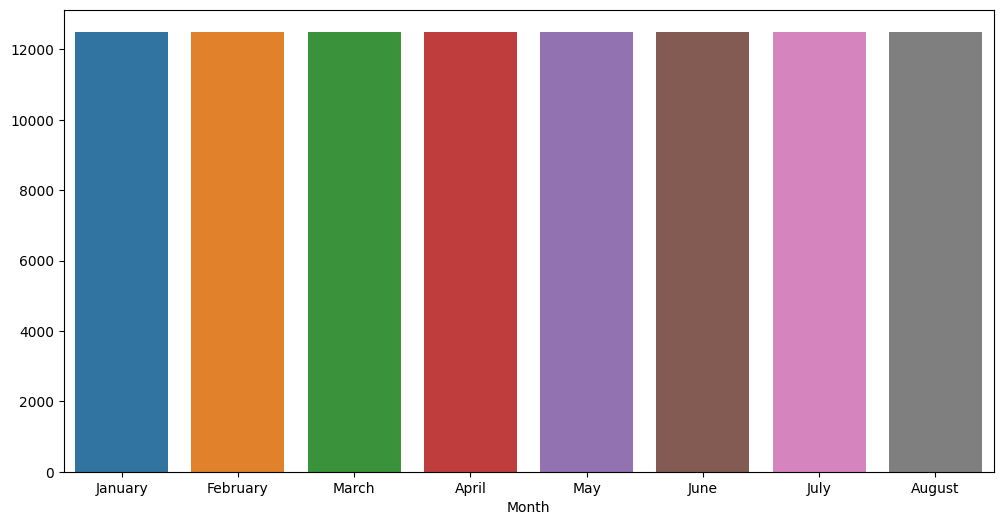

In [24]:
# distribution of Month
month_counts = df['Month'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=month_counts.index, y=month_counts.values)

<Axes: xlabel='Credit_Mix'>

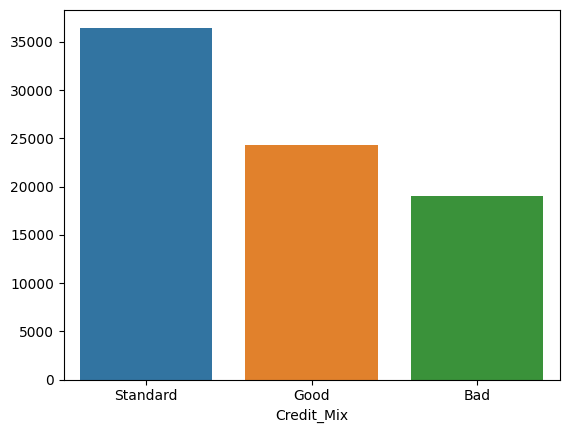

In [25]:
# distribution of Credit_mix
credit_mix_counts = df['Credit_Mix'].value_counts()
sns.barplot(x=credit_mix_counts.index, y=credit_mix_counts.values)

<Axes: xlabel='Payment_of_Min_Amount'>

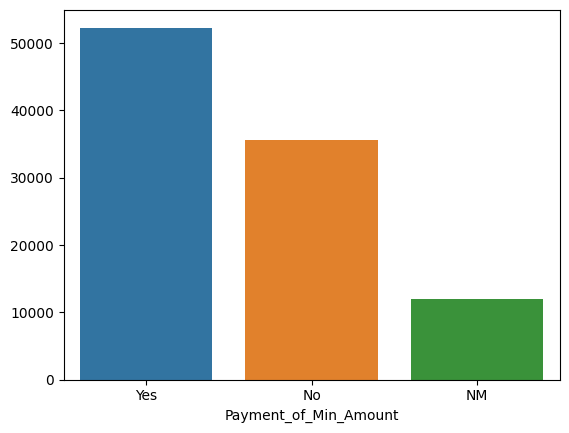

In [26]:
# distribuion of Payment_of_Min_Amount
min_payment_counts = df['Payment_of_Min_Amount'].value_counts()
sns.barplot(x=min_payment_counts.index, y=min_payment_counts.values)

<Axes: xlabel='Credit_Score'>

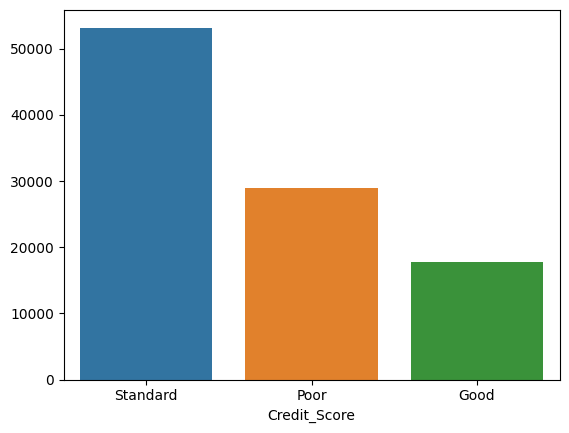

In [27]:
# distribution of Credit_Score
credit_score_counts = df['Credit_Score'].value_counts()
sns.barplot(x=credit_score_counts.index, y=credit_score_counts.values)

In [28]:
# Check the percentage of each credit score type.
df['Credit_Score'].value_counts(normalize=True)

Credit_Score
Standard    0.53174
Poor        0.28998
Good        0.17828
Name: proportion, dtype: float64

/var/folders/jh/lwh9h51151s6_693cw5_28cr0000gn/T/ipykernel_30640/2205281181.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Monthly_Inhand_Salary'])


<Axes: xlabel='Monthly_Inhand_Salary', ylabel='Density'>

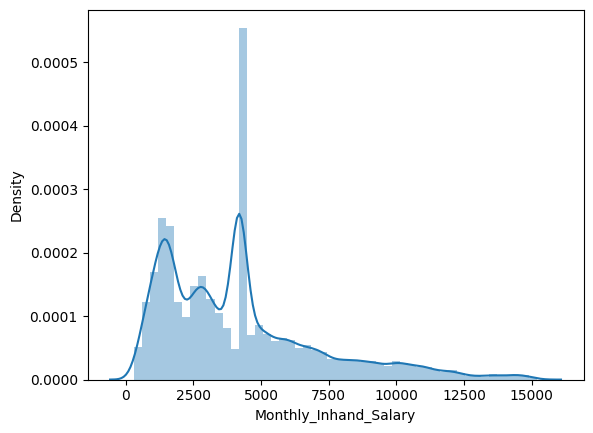

In [29]:
# Distribution plot of Monthly_Inhand_Salary 
sns.distplot(df['Monthly_Inhand_Salary'])

<Axes: >

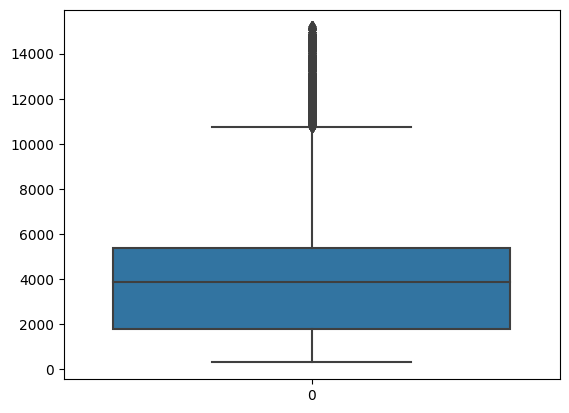

In [30]:
# boxplot of Monthly_Inhand_Salary
sns.boxplot(df['Monthly_Inhand_Salary'])

/var/folders/jh/lwh9h51151s6_693cw5_28cr0000gn/T/ipykernel_30640/3743911909.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Num_Bank_Accounts'])


<Axes: xlabel='Num_Bank_Accounts', ylabel='Density'>

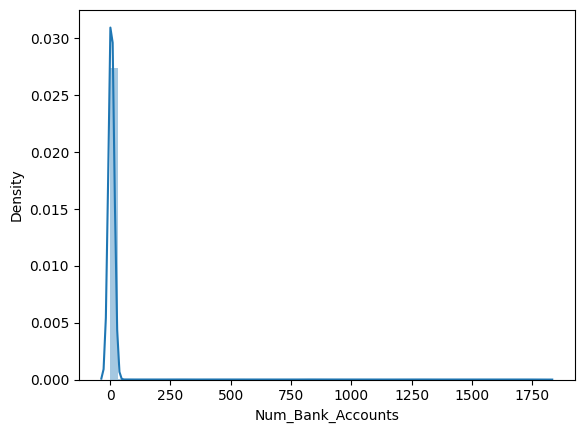

In [31]:
# Distribution plot of Num_Bank_Accounts
sns.distplot(df['Num_Bank_Accounts'])

/var/folders/jh/lwh9h51151s6_693cw5_28cr0000gn/T/ipykernel_30640/869967631.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Num_Credit_Card'])


<Axes: xlabel='Num_Credit_Card', ylabel='Density'>

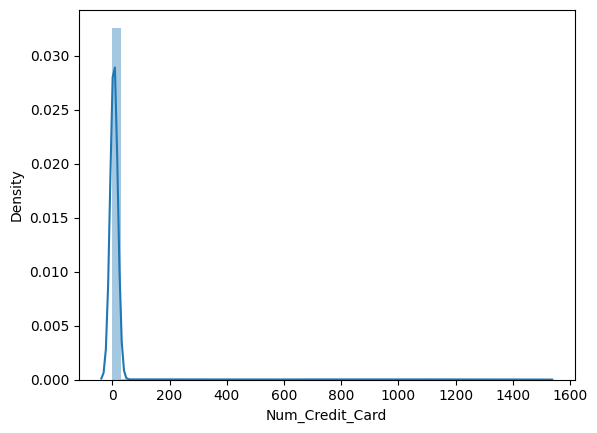

In [32]:
# Distribution plot of Num_Credit_Card
sns.distplot(df['Num_Credit_Card'])

/var/folders/jh/lwh9h51151s6_693cw5_28cr0000gn/T/ipykernel_30640/122691628.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Delay_from_due_date'])


<Axes: xlabel='Delay_from_due_date', ylabel='Density'>

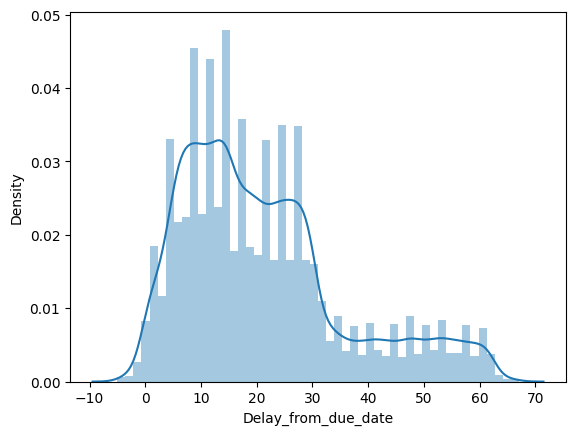

In [33]:
# Distribution plot of Delay_from_due_date
sns.distplot(df['Delay_from_due_date'])

/var/folders/jh/lwh9h51151s6_693cw5_28cr0000gn/T/ipykernel_30640/1069058872.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Credit_Utilization_Ratio'])


<Axes: xlabel='Credit_Utilization_Ratio', ylabel='Density'>

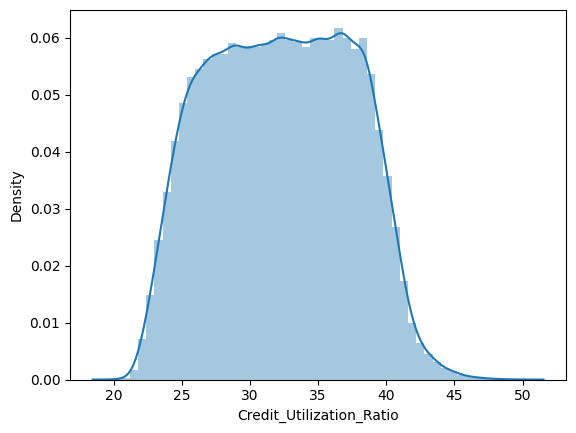

In [34]:
# distribution plot of Credit_Utilization_Ratio
sns.distplot(df['Credit_Utilization_Ratio'])

### Data Preprocessing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  int64  
 5   SSN                       94428 non-null   object 
 6   Occupation                92938 non-null   object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  int64  
 13  Type_of_Loan              88592 non-null   ob

In [36]:
# remove ID, Name, SSN
df.drop(['ID', 'Name', 'SSN'], axis=1, inplace=True)

In [37]:
# Num_Bank_Accounts absolut value
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x: abs(x))

In [38]:
# Replace all occurrences of 0 in the 'Num_Credit_Card' column with 1
df['Num_Credit_Card'].replace(0, 1, inplace=True)

In [39]:
# replace "NM" with "No" in the 'Payment_of_Min_Amount' column
df['Payment_of_Min_Amount'].replace("NM","No",inplace=True)

In [40]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
Name: count, dtype: int64

In [41]:
# convert Payment_Behaviour into dummy variable
pb_dummy_df = pd.get_dummies(df['Payment_Behaviour'])
pb_dummy_df = pb_dummy_df.astype(int)
df = pd.concat([df, pb_dummy_df], axis=1)

In [42]:
df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,High_spent_Large_value_payments,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,CUS_0xd40,January,23,Scientist,19114.12,1824.843333,3,4,3,4,...,80.415295,High_spent_Small_value_payments,312.494089,Good,0,0,1,0,0,0
1,CUS_0xd40,February,23,Scientist,19114.12,4194.170850,3,4,3,4,...,118.280222,Low_spent_Large_value_payments,284.629162,Good,0,0,0,1,0,0
2,CUS_0xd40,March,-500,Scientist,19114.12,4194.170850,3,4,3,4,...,81.699521,Low_spent_Medium_value_payments,331.209863,Good,0,0,0,0,1,0
3,CUS_0xd40,April,23,Scientist,19114.12,4194.170850,3,4,3,4,...,199.458074,Low_spent_Small_value_payments,223.451310,Good,0,0,0,0,0,1
4,CUS_0xd40,May,23,Scientist,19114.12,1824.843333,3,4,3,4,...,41.420153,High_spent_Medium_value_payments,341.489231,Good,0,1,0,0,0,0


In [43]:
df['Occupation'].value_counts()

Occupation
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [44]:
# remove missing value of Occupation
df.dropna(subset=['Occupation'], inplace=True)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92938 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_ID                       92938 non-null  object 
 1   Month                             92938 non-null  object 
 2   Age                               92938 non-null  int64  
 3   Occupation                        92938 non-null  object 
 4   Annual_Income                     92938 non-null  float64
 5   Monthly_Inhand_Salary             92938 non-null  float64
 6   Num_Bank_Accounts                 92938 non-null  int64  
 7   Num_Credit_Card                   92938 non-null  int64  
 8   Interest_Rate                     92938 non-null  int64  
 9   Num_of_Loan                       92938 non-null  int64  
 10  Type_of_Loan                      82395 non-null  object 
 11  Delay_from_due_date               92938 non-null  int64  
 12  Num_of_De

In [46]:
# Check distributionof Credit_Mix
df['Credit_Mix'].value_counts()

Credit_Mix
Standard    33916
Good        22618
Bad         17630
Name: count, dtype: int64

In [47]:
df['Credit_Mix'].replace('', np.nan, inplace=True)

In [48]:
credit_mix_map = {
    "Bad":0,
    "Standard":1,
    "Good":2,
    "_":np.nan
}

In [49]:
# transform Credit_Mix to integer
df['Credit_Mix'] = df['Credit_Mix'].map(credit_mix_map)

In [50]:
# Get the top 9 most frequent values in the 'Type_of_Loan' column (excluding the first one)
top_values = df['Type_of_Loan'].value_counts().head(9).index[1:]

# Use pd.get_dummies() to create dummy variables for the 'Type_of_Loan' column
dummy_df = pd.get_dummies(df['Type_of_Loan'])
dummy_df = dummy_df.astype(int)
# Select only the columns corresponding to the top 9 most frequent values
dummy_df = dummy_df[top_values]

# Concatenate the dummy variables with the original DataFrame 'df'
df = pd.concat([df, dummy_df], axis=1)

# Drop the original 'Type_of_Loan' column
df.drop('Type_of_Loan', axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92938 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_ID                       92938 non-null  object 
 1   Month                             92938 non-null  object 
 2   Age                               92938 non-null  int64  
 3   Occupation                        92938 non-null  object 
 4   Annual_Income                     92938 non-null  float64
 5   Monthly_Inhand_Salary             92938 non-null  float64
 6   Num_Bank_Accounts                 92938 non-null  int64  
 7   Num_Credit_Card                   92938 non-null  int64  
 8   Interest_Rate                     92938 non-null  int64  
 9   Num_of_Loan                       92938 non-null  int64  
 10  Delay_from_due_date               92938 non-null  int64  
 11  Num_of_Delayed_Payment            86446 non-null  float64
 12  Changed_C

<Axes: >

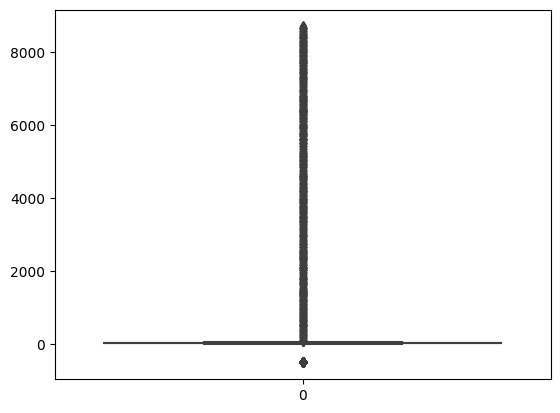

In [52]:
sns.boxplot(df['Age'])

In [53]:
df["Age"].describe()

count    92938.000000
mean       110.916439
std        687.517069
min       -500.000000
25%         24.000000
50%         33.000000
75%         42.000000
max       8698.000000
Name: Age, dtype: float64

In [54]:
# Calculate the mean of the 'Age' column for values within the desired range
mean_age = df[(df['Age'] >= 18) & (df['Age'] <= 90)]['Age'].mean()

# Replace values less than 18 and greater than 90 with the mean age
df['Age'] = df['Age'].apply(lambda x: mean_age if (x < 18 or x > 90) else x)

In [55]:
# Fill more NA values with Mean
df['Num_of_Delayed_Payment'] = df['Num_of_Delayed_Payment'].fillna(df['Num_of_Delayed_Payment'].mean())
df['Changed_Credit_Limit'] = df['Changed_Credit_Limit'].fillna(df['Changed_Credit_Limit'].mean())
df['Credit_History_Age'] = df['Credit_History_Age'].fillna(df['Credit_History_Age'].mean())
df['Amount_invested_monthly'] = df['Amount_invested_monthly'].fillna(df['Amount_invested_monthly'].mean())
df['Monthly_Balance'] = df['Monthly_Balance'].fillna(df['Monthly_Balance'].mean())

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92938 entries, 0 to 99999
Data columns (total 38 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Customer_ID                       92938 non-null  object 
 1   Month                             92938 non-null  object 
 2   Age                               92938 non-null  float64
 3   Occupation                        92938 non-null  object 
 4   Annual_Income                     92938 non-null  float64
 5   Monthly_Inhand_Salary             92938 non-null  float64
 6   Num_Bank_Accounts                 92938 non-null  int64  
 7   Num_Credit_Card                   92938 non-null  int64  
 8   Interest_Rate                     92938 non-null  int64  
 9   Num_of_Loan                       92938 non-null  int64  
 10  Delay_from_due_date               92938 non-null  int64  
 11  Num_of_Delayed_Payment            92938 non-null  float64
 12  Changed_C